In [1]:
import pandas as pd
import numpy as np

heart_disease = pd.read_csv('https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv') 

Part 1)

Want to see if we can create a possible coding solution that can predict whether an individual has a heart disease based off of previous samples and the patient's current results to a consultation.

Part 2)

In [2]:
#question 6 has to be done in question 2 to avoid tedious coding.
heart_diseaseD = heart_disease.dropna()

#question 2 is now done applying transformations to the data
response_var = heart_diseaseD['num']

from sklearn.preprocessing import scale, StandardScaler
#KNN requires scaling
KNN_Predictor = heart_diseaseD.drop(columns=['num'])
scaler = StandardScaler()
KNN_PredictorV = pd.DataFrame(scaler.fit_transform(heart_diseaseD.drop(columns=['num'])), columns=heart_diseaseD.columns[:-1])

#Tree Classification does not require scaling
Tree_Predictor = heart_diseaseD.drop(columns=['num'])

Part 3)

The categorical variables in the dataset are sex, cp, fbs, restecg, exang, slope and thal. The other variables are all integers. Our target variable will be "num", the diagnosis of heart disease. The thal and ca variables both contain missing values.

Part 4)

In [3]:
heart_diseaseD = heart_diseaseD.replace({'num': { 2: 1, 3: 1, 4: 1}})
ResponseVar = response_var.replace({2:1,3:1,4:1})

ResponseVar.head(5)

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

Part 5)

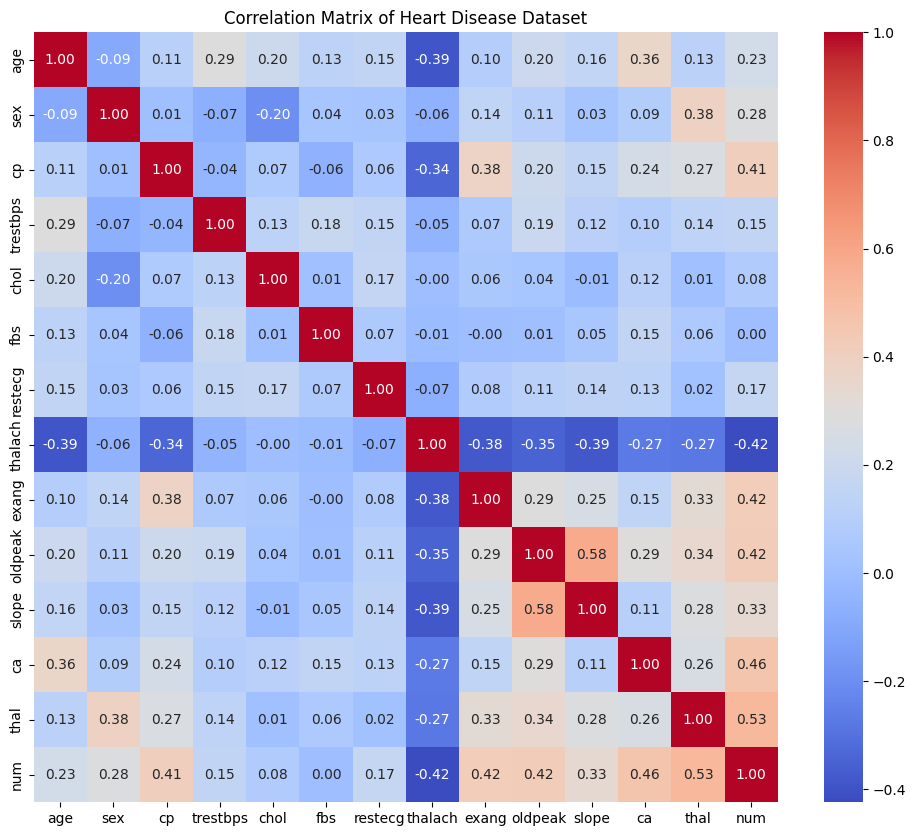

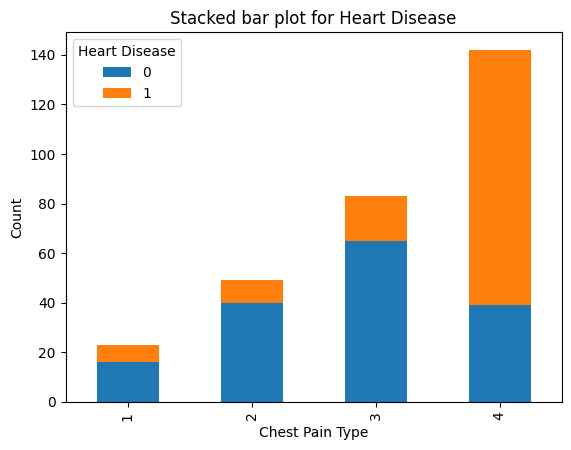

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = heart_diseaseD.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

stacked_data = heart_diseaseD.groupby(['cp','num']).size().unstack().fillna(0)
stacked_data.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.xlabel('Chest Pain Type')
plt.title('Stacked bar plot for Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

Using a correlation matrix for the Heart Disease dataset we can see how well the features correlate with the response variable 'num'. Based on the results, thal has the highest correlation with the other variables and the highest correlation (0.53) to the response variable indicating its potential significance in feature selection. On the other hand, fbs and chol have very low correlation with the other variables and the response variable suggesting they may not be significant features.

The stacked bar graph shows the amount of people that do or don't have a heart disease with each chest pain type. Clearly as the chest pain type increases the amount of people with heart disease also increases. This indicates that chest pain type is a significant feature in predicting heart disease.